In [121]:
# Import necessary libraries
import pandas as pd
import numpy as np

#Chart library
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

# models
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

# Filter out specific warning categories
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

In [122]:
# Load the dataset
data = pd.read_csv("diabetes.csv")
data.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


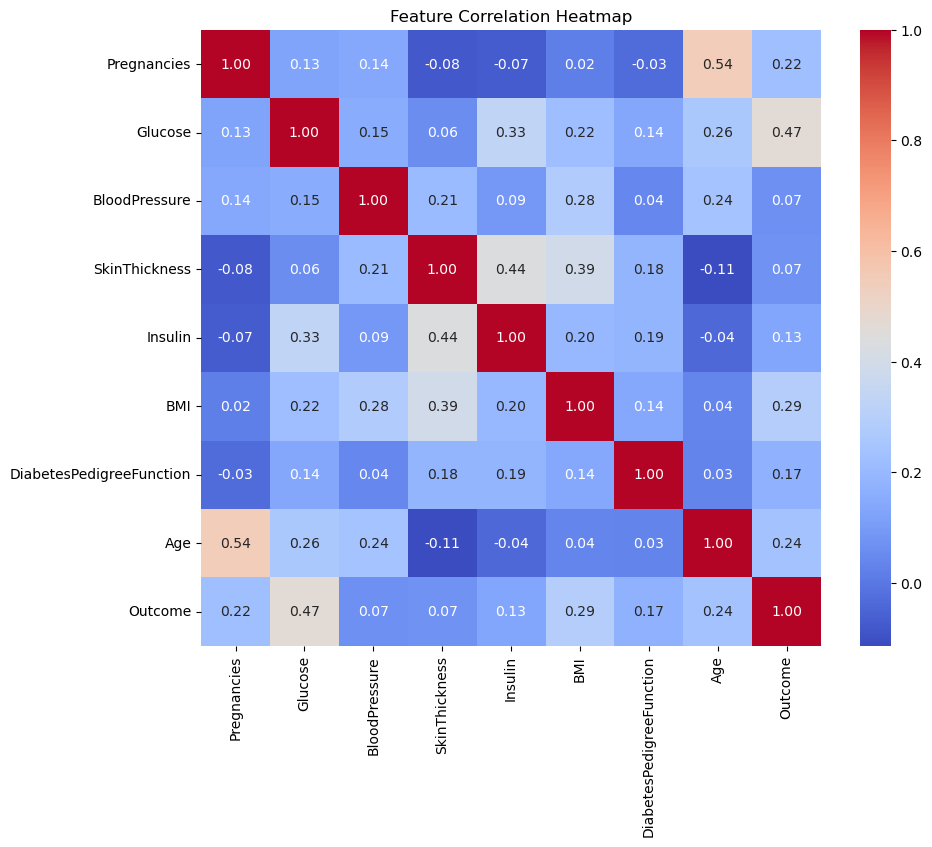

In [123]:
data.corr()
correlation_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Feature Correlation Heatmap')
plt.show()

In [124]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [125]:
# Data preprocessing
X = data.drop("Outcome", axis=1)
y = data["Outcome"]

In [126]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Data scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train a logistic regression model
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = model.predict(X_test_scaled)
#print(y_pred)

In [127]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{confusion}")
print(f"Classification Report:\n{report}")

Accuracy: 0.7532467532467533
Confusion Matrix:
[[79 20]
 [18 37]]
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.80      0.81        99
           1       0.65      0.67      0.66        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.75       154



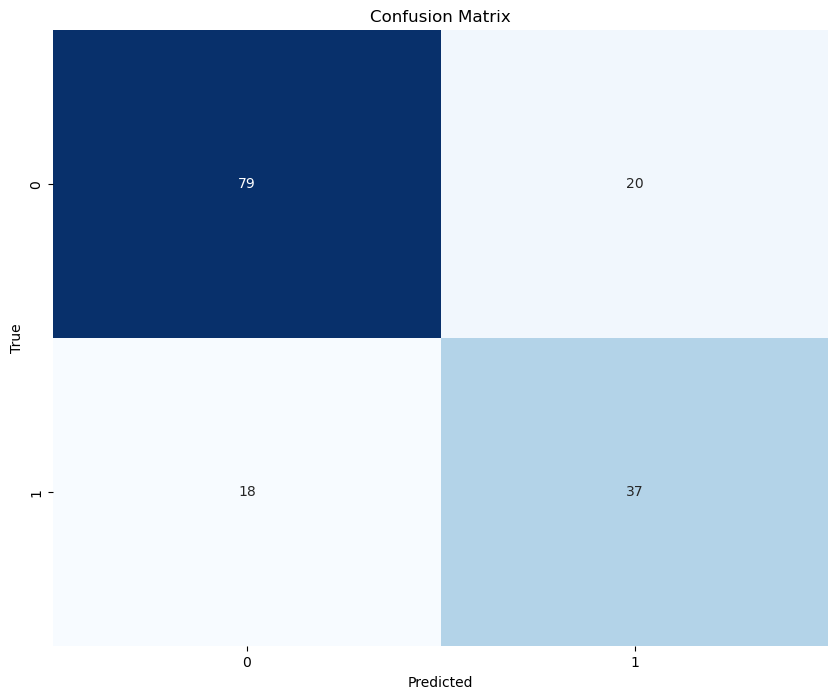

In [128]:
plt.figure(figsize=(10, 8))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [129]:
param_grid = {
    "C": [0.001, 0.01, 0.1, 1, 10, 100],
}

solvers = {
    "lbfgs": ["l2", None],
    "liblinear": ["l1", "l2"],
    "newton-cg": ["l2", None],
    "newton-cholesky": ["l2", None],
    "sag": ["l2", None],
    "saga": ["elasticnet", "l1", "l2", None]
}

cvs = [2, 10]

#for key, value in solvers.items():
    #print(f"{key}: {value}")
#    for alpha in param_grid.items():
        #print(alpha)
#        for cval in cvs:
            #print(cvs)


In [130]:
best_accuracy = 0
best_model = None 


In [131]:
for solver, penalties in solvers.items():
    for penalty in penalties:
        for c_val in param_grid["C"]:
            for cv_fold in cvs:
                #print(f"Solver: {solver}, Penalty: {penalty}, C: {c_val}, CV Fold: {cv_fold}")

                if penalty == 'elasticnet':
                    l1_ratio = 0.5
                    model = LogisticRegression(solver=solver, penalty=penalty, C=c_val, l1_ratio=l1_ratio)
                else:
                    model = LogisticRegression(solver=solver, penalty=penalty, C=c_val)

                cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=cv_fold)
                mean_cv_accuracy = np.mean(cv_scores)

                #print(f"Cross-Validation Accuracy: {mean_cv_accuracy}\n")

                if mean_cv_accuracy > best_accuracy:
                    best_accuracy = mean_cv_accuracy
                    best_model = model

In [132]:
print(f"The best Model is: {best_model}")
#print(best_model)
print(f"The highest accuracy it returns is: {best_accuracy:.4f}")
#print(best_accuracy)

The best Model is: LogisticRegression(C=0.1, penalty='l1', solver='saga')
The highest accuracy it returns is: 0.7736


In [133]:
# Initialize and train a Gaussian Naive Bayes model
gnb_model = GaussianNB()
gnb_model.fit(X_train_scaled, y_train)


GaussianNB()

In [134]:
nb_classifier = GaussianNB()

params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}
gs_NB = GridSearchCV(estimator=nb_classifier, 
                 param_grid=params_NB, 
                 cv=5,   
                 verbose=1, 
                 scoring='accuracy') 
gs_NB.fit(X_train_scaled, y_train)

gs_NB.best_params_

Fitting 5 folds for each of 100 candidates, totalling 500 fits


{'var_smoothing': 0.0657933224657568}

In [135]:
# Make predictions
y_pred_gnb = gnb_model.predict(X_test_scaled)

print(f"Accuracy of Gaussian Naive Bayes: {accuracy_gnb:.4f}")

# Evaluate the model

report = classification_report(y_test, y_pred_gnb)

print(f"Classification Report:\n{report}")

Accuracy of Gaussian Naive Bayes: 0.7662
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.80      0.81        99
           1       0.66      0.71      0.68        55

    accuracy                           0.77       154
   macro avg       0.75      0.75      0.75       154
weighted avg       0.77      0.77      0.77       154



In [136]:
# Initialize and train a Gaussian Naive Bayes model
svc_model = SVC()
svc_model.fit(X_train_scaled, y_train)


SVC()

In [137]:
svc_classifier = SVC()

param_grid = [
  {'C': [1, 10, 100, 1000], 'kernel': ['linear']},
  {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']},
 ]
gs_svc = GridSearchCV(estimator=svc_classifier, 
                 param_grid=param_grid, 
                 cv=5,   
                 verbose=1, 
                 scoring='accuracy') 
gs_svc.fit(X_train_scaled, y_train)

gs_svc.best_params_

Fitting 5 folds for each of 12 candidates, totalling 60 fits


{'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}

In [138]:
# Make predictions
y_pred_svc = svc_model.predict(X_test_scaled)

# Evaluate the Gaussian Naive Bayes model

print(f"Accuracy of SVC: {accuracy_svc:.4f}")

# Evaluate the model

report = classification_report(y_test, y_pred_svc)

print(f"Classification Report:\n{report}")

Accuracy of SVC: 0.7338
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.83      0.80        99
           1       0.65      0.56      0.60        55

    accuracy                           0.73       154
   macro avg       0.71      0.70      0.70       154
weighted avg       0.73      0.73      0.73       154

